C:\Users\devas\AppData\Local\Temp\ipykernel_428\3146917411.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)
C:\Users\devas\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 434s 817ms/step - accuracy: 0.7054 - loss: 0.5400 - val_accuracy: 0.8229 - val_loss: 0.4043
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 387s 773ms/step - accuracy: 0.8377 - loss: 0.3885 - val_accuracy: 0.8497 - val_loss: 0.3539
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 276s 550ms/step - accuracy: 0.8617 - loss: 0.3315 - val_accuracy: 0.8562 - val_loss: 0.3378
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 227s 455ms/step - accuracy: 0.8900 - loss: 0.2763 - val_accuracy: 0.8528 - val_loss: 0.3528
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 223s 445ms/step - accuracy: 0.8919 - loss: 0.2716 - val_accuracy: 0.8773 - val_loss: 0.3165


Model saved as 'lstm_sentiment_model.h5'


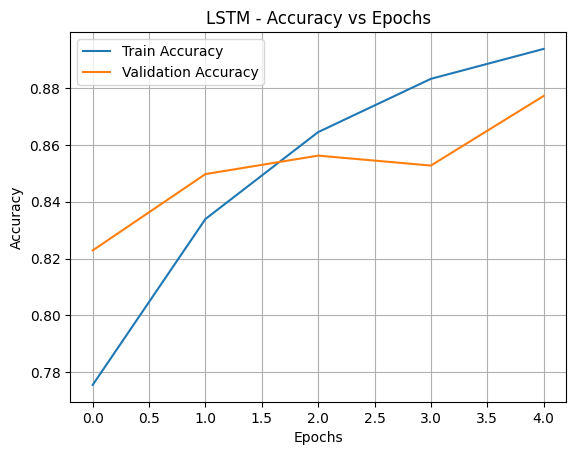

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load and preprocess dataset
data = pd.read_csv("IMDB Dataset.csv")
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

# LSTM model definition
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation="sigmoid"))

# Compile and train
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm_history = lstm_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

# Save model
lstm_model.save("lstm_sentiment_model.h5")
print("Model saved as 'lstm_sentiment_model.h5'")

# Plot accuracy vs epochs
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(lstm_history, "LSTM")


C:\Users\devas\AppData\Local\Temp\ipykernel_1764\900011776.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


Model loaded successfully.
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step


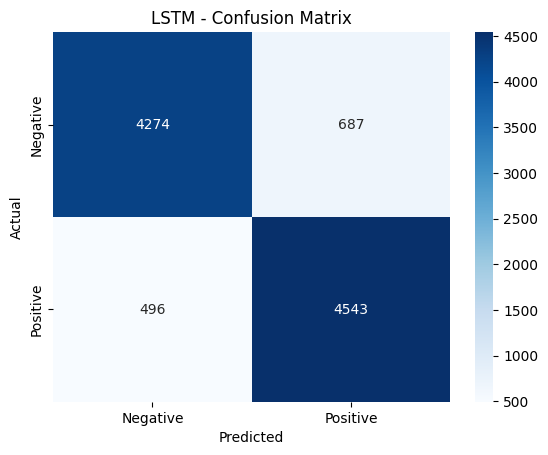

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv("IMDB Dataset.csv")
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)
Y_test = test_data["sentiment"]

from tensorflow.keras.models import load_model
model = load_model("lstm_sentiment_model.h5")
print("Model loaded successfully.")

y_pred = model.predict(X_test).round()

def plot_confusion_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(Y_test, y_pred, "LSTM")
